In [1]:
# Base Libraries
import os
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# pip install tensorflow==2.14.0
# !pip install opendatasets --upgrade --quiet

^C


In [ ]:
# import opendatasets as od

In [3]:
print(tf.__version__)

2.16.1


In [ ]:
# # Assign the Kaggle data set URL into variable
# dataset = 'https://www.kaggle.com/datasets/jessicali9530/kuc-hackathon-winter-2018/data'
# # Using opendatasets let's download the data sets
# od.download(dataset)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: khrystynadolynska
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/jessicali9530/kuc-hackathon-winter-2018


100%|██████████| 40.7M/40.7M [00:00<00:00, 69.9MB/s]


In [4]:
# df = pd.read_csv('kuc-hackathon-winter-2018/drugsComTrain_raw.csv')
df = pd.read_csv('./data/drug_review_train.csv')

In [5]:
df.head()

,Unnamed: 0,patient_id,drugName,condition,review,rating,date,usefulCount,review_length
0,0,89879,Cyclosporine,keratoconjunctivitis sicca,"""i have used restasis for about a year now and...",2.0,"April 20, 2013",69,147
1,1,143975,Etonogestrel,birth control,"""my experience has been somewhat mixed. i have...",7.0,"August 7, 2016",4,136
2,2,106473,Implanon,birth control,"""this is my second implanon would not recommen...",1.0,"May 11, 2016",6,140
3,3,184526,Hydroxyzine,anxiety,"""i recommend taking as prescribed, and the bot...",10.0,"March 19, 2012",124,104
4,4,91587,Dalfampridine,multiple sclerosis,"""i have been on ampyra for 5 days and have bee...",9.0,"August 1, 2010",101,74


In [7]:
# df['uniqueID' == 184526]
df.loc[df['patient_id'] == 184526]

,Unnamed: 0,patient_id,drugName,condition,review,rating,date,usefulCount,review_length
3,3,184526,Hydroxyzine,anxiety,"""i recommend taking as prescribed, and the bot...",10.0,"March 19, 2012",124,104


In [8]:
df.isnull().sum()

Unnamed: 0       0
patient_id       0
drugName         0
condition        0
review           0
rating           0
date             0
usefulCount      0
review_length    0
dtype: int64

In [9]:
# df.duplicated()
df.loc[df.duplicated() == True]

,Unnamed: 0,patient_id,drugName,condition,review,rating,date,usefulCount,review_length


In [10]:
mean_useful_count_by_rating = df.groupby('rating')['usefulCount'].mean()
print(mean_useful_count_by_rating)

rating
1.0     15.341453
2.0     15.567420
3.0     15.394053
4.0     16.424450
5.0     17.366661
6.0     19.615049
7.0     23.478639
8.0     29.355881
9.0     34.163755
10.0    39.077040
Name: usefulCount, dtype: float64


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

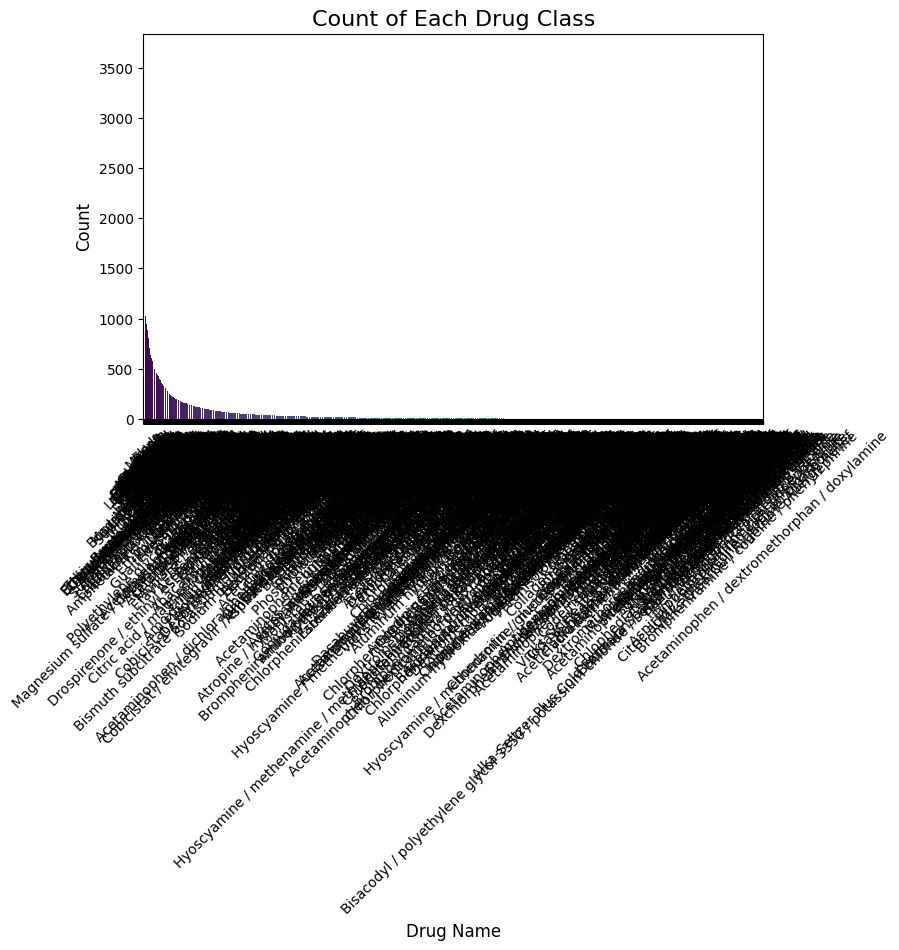

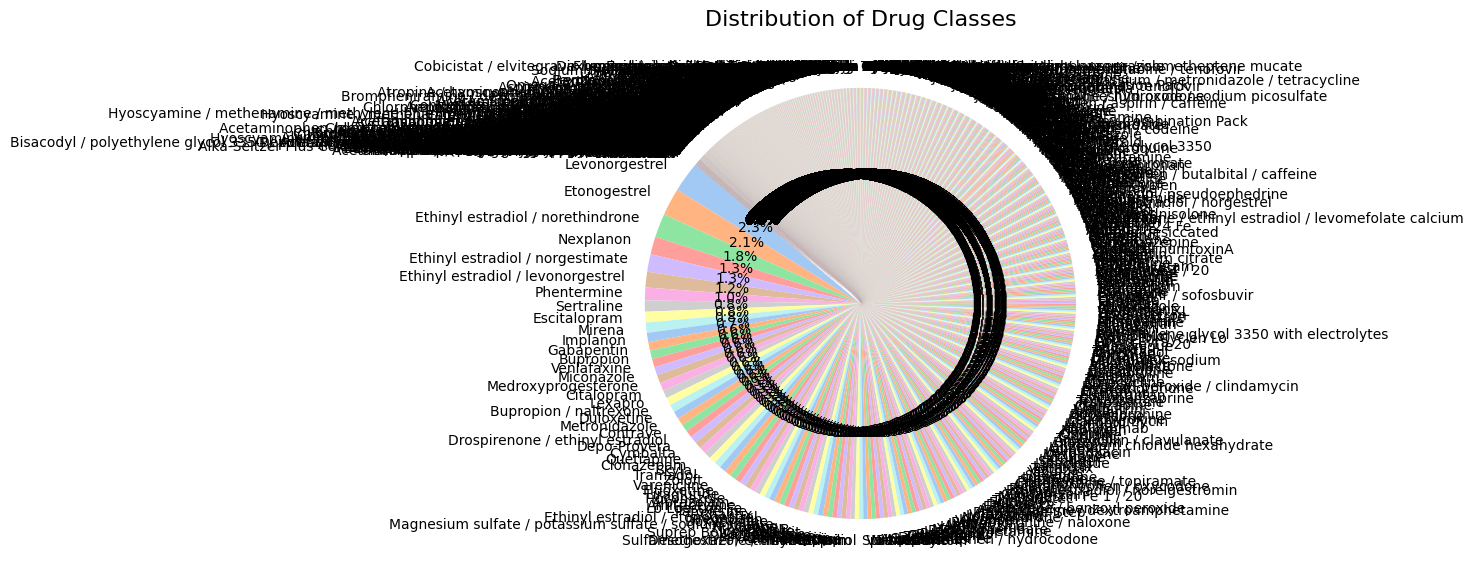

In [18]:
drug_counts = df['drugName'].value_counts()

# --- Bar Chart ---
plt.figure(figsize=(8, 5))
sns.barplot(x=drug_counts.index, y=drug_counts.values, palette="viridis")
plt.title('Count of Each Drug Class', fontsize=16)
plt.xlabel('Drug Name', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Pie Chart ---
plt.figure(figsize=(7, 7))
plt.pie(drug_counts.values, labels=drug_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Distribution of Drug Classes', fontsize=16)
plt.show()

In [11]:
drug_counts = df['drugName'].value_counts()

drug_table = drug_counts.reset_index()
drug_table.columns = ['DrugName', 'Count']

drug_table[:10]

,DrugName,Count
0,Levonorgestrel,2833
1,Etonogestrel,2577
2,Ethinyl estradiol / norethindrone,2121
3,Nexplanon,1672
4,Ethinyl estradiol / norgestimate,1549
5,Ethinyl estradiol / levonorgestrel,1370
6,Phentermine,1132
7,Sertraline,981
8,Mirena,959
9,Escitalopram,921


In [12]:
drug_table[-10:]

,DrugName,Count
2855,Darvocet A500,1
2856,Jencycla,1
2857,Darbepoetin alfa,1
2858,Fluzone,1
2859,Fallback Solo,1
2860,Calamine,1
2861,Synjardy,1
2862,Vitamin B6,1
2863,Cetirizine / pseudoephedrine,1
2864,Miacalcin,1


In [13]:
len(drug_table)

2865

In [14]:
condition_counts = df['condition'].value_counts()

condition_table = condition_counts.reset_index()
condition_table.columns = ['Condition', 'Count']

condition_table[:10]

,Condition,Count
0,birth control,22123
1,depression,6444
2,acne,4145
3,anxiety,3964
4,pain,3773
5,bipolar disorde,2880
6,weight loss,2637
7,obesity,2610
8,insomnia,2417
9,adhd,2375


In [15]:
condition_table[-10:]

,Condition,Count
781,llicular lymphoma,1
782,dupuytren's contracture,1
783,26</span> users found this comment helpful.,1
784,primary hyperaldosteronism diagnosis,1
785,"delayed puberty, male",1
786,cogan's syndrome,1
787,stress ulcer prophylaxis,1
788,paget's disease,1
789,small bowel or pancreatic fistula,1
790,98</span> users found this comment helpful.,1


In [16]:
len(condition_table)

791